CSCI E-82 - Advanced Machine Learning, Data Mining and Artificial Intelligence
=====

## Topic Presentation
## RHEE, Jaehyon (Jay)   &  SHENOY, Deepak

In [1]:
# loading libraries
import pandas as pd
import os

import matplotlib.pyplot as plt
# to use inline to get your plots in the notebook
%matplotlib inline

import sklearn
from sklearn import decomposition, preprocessing
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix

## Data Loading

In [2]:
# working directory
os.chdir(r'C:\Users\jrhee\Documents\00_CSCI_E-82\topic_presentation')
#os.chdir('/home/jrhee/CSCI_E-82/Topic_Presentation')
os.getcwd()

'C:\\Users\\jrhee\\Documents\\00_CSCI_E-82\\topic_presentation'

#### Multiple Shapes Data

In [3]:
df_ms = pd.read_csv('multishapes.csv', sep=',', header=0)

In [4]:
df_ms.shape

(1100, 3)

In [5]:
df_ms.count()

x        1100
y        1100
shape    1100
dtype: int64

In [6]:
df_ms.head()

x         y  shape
0 -0.803739 -0.853053      1
1  0.852851  0.367618      1
2  0.927180 -0.274902      1
3 -0.752626 -0.511565      1
4  0.706846  0.810679      1

In [7]:
df_ms['shape'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

#### Wine Data

In [8]:
df_r = pd.read_csv('winequality-red.csv', sep=';', header=0)
df_w = pd.read_csv('winequality-white.csv', sep=';', header=0)

In [9]:
df_r.shape

(1599, 12)

In [10]:
df_w.shape

(4898, 12)

In [11]:
df_r.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [12]:
df_w.count()

fixed acidity           4898
volatile acidity        4898
citric acid             4898
residual sugar          4898
chlorides               4898
free sulfur dioxide     4898
total sulfur dioxide    4898
density                 4898
pH                      4898
sulphates               4898
alcohol                 4898
quality                 4898
dtype: int64

In [13]:
df_r.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [14]:
df_w.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [15]:
df_r['color'] = 'red'
df_w['color'] = 'white'

In [16]:
df_all = pd.concat([df_r, df_w], ignore_index=True)

In [17]:
df_all.shape

(6497, 13)

In [18]:
df_all.count()

fixed acidity           6497
volatile acidity        6497
citric acid             6497
residual sugar          6497
chlorides               6497
free sulfur dioxide     6497
total sulfur dioxide    6497
density                 6497
pH                      6497
sulphates               6497
alcohol                 6497
quality                 6497
color                   6497
dtype: int64

In [19]:
df_all.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2      9.8        5   red  
3      9.8        6   red  
4      9.4        5   red

In [20]:
# standardization
df_st = df_all.iloc[:, 0:11].copy()
df_st.iloc[:,:] = preprocessing.StandardScaler().fit_transform(df_st.iloc[:,:])

In [21]:
df_st.shape

(6497, 11)

In [22]:
df_st.count()

fixed acidity           6497
volatile acidity        6497
citric acid             6497
residual sugar          6497
chlorides               6497
free sulfur dioxide     6497
total sulfur dioxide    6497
density                 6497
pH                      6497
sulphates               6497
alcohol                 6497
dtype: int64

In [23]:
df_st.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.142473          2.188833    -2.192833       -0.744778   0.569958   
1       0.451036          3.282235    -2.192833       -0.597640   1.197975   
2       0.451036          2.553300    -1.917553       -0.660699   1.026697   
3       3.073817         -0.362438     1.661085       -0.744778   0.541412   
4       0.142473          2.188833    -2.192833       -0.744778   0.569958   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -1.100140             -1.446359  1.034993  1.813090   0.193097   
1            -0.311320             -0.862469  0.701486 -0.115073   0.999579   
2            -0.874763             -1.092486  0.768188  0.258120   0.797958   
3            -0.762074             -0.986324  1.101694 -0.363868   0.327510   
4            -1.100140             -1.446359  1.034993  1.813090   0.193097   

    alcohol  
0 -0.915464  
1 -0.580068  
2 -0.580068  
3 -0.580068  
4 -0.915464

In [24]:
df_st.describe()

fixed acidity  volatile acidity   citric acid  residual sugar  \
count   6.497000e+03      6.497000e+03  6.497000e+03    6.497000e+03   
mean    1.007471e-15      1.002225e-15 -1.753083e-16   -1.693547e-15   
std     1.000077e+00      1.000077e+00  1.000077e+00    1.000077e+00   
min    -2.634589e+00     -1.577330e+00 -2.192833e+00   -1.018034e+00   
25%    -6.289329e-01     -6.661613e-01 -4.723335e-01   -7.657978e-01   
50%    -1.660892e-01     -3.016939e-01 -5.941375e-02   -5.135612e-01   
75%     3.738951e-01      3.664962e-01  4.911459e-01    5.584445e-01   
max     6.699425e+00      7.534354e+00  9.231281e+00    1.268682e+01   

          chlorides  free sulfur dioxide  total sulfur dioxide       density  \
count  6.497000e+03         6.497000e+03          6.497000e+03  6.497000e+03   
mean   3.303499e-16         1.009232e-15         -9.658103e-16 -4.708938e-15   
std    1.000077e+00         1.000077e+00          1.000077e+00  1.000077e+00   
min   -1.342639e+00        -1.663583e+00         -1.941780e+00 -2.530192e+00   
25%   -5.147986e-01        -7.620742e-01         -6.855323e-01 -7.859527e-01   
50%   -2.578826e-01        -8.594301e-02          3.990667e-02  6.448888e-02   
75%    2.559494e-01         5.901882e-01          7.122647e-01  7.648525e-01   
max    1.584219e+01         1.456357e+01          5.737257e+00  1.476879e+01   

                 pH     sulphates       alcohol  
count  6.497000e+03  6.497000e+03  6.497000e+03  
mean   3.086803e-15  3.102883e-16  1.542248e-15  
std    1.000077e+00  1.000077e+00  1.000077e+00  
min   -3.100615e+00 -2.091935e+00 -2.089350e+00  
25%   -6.748622e-01 -6.805919e-01 -8.316152e-01  
50%   -5.287424e-02 -1.429373e-01 -1.608231e-01  
75%    6.313125e-01  4.619241e-01  6.776670e-01  
max    4.923029e+00  9.870879e+00  3.696231e+00

## <font color='red'>Analyses :: Multiple Shapes Data</font>

### Original Classification

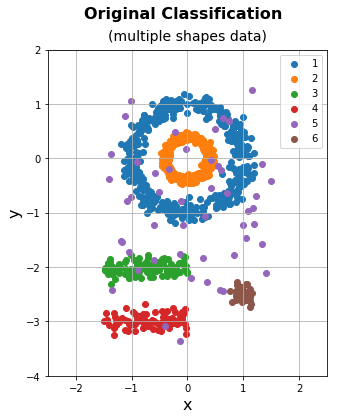

In [25]:
plt.figure(figsize=(5,6))

for label in df_ms['shape'].unique():
    plt.scatter(df_ms.iloc[df_ms[df_ms['shape']==label].index, 0],
                df_ms.iloc[df_ms[df_ms['shape']==label].index, 1],
                label=label)

plt.axis([-2.5, 2.5, -4, 2])
plt.grid(True)
plt.suptitle('Original Classification', y=0.98, fontsize=16, fontweight='bold')
plt.title('(multiple shapes data)', y=1.01, fontsize=14)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.legend()
plt.show()
# plt.savefig('fig01.jpg')

### DBSCAN: Effect of Epsilon

In [26]:
plt.figure(figsize=(16,18))
plt.suptitle('DBSCAN: Effect of Epsilon (w/ min_samples = 5)', y=0.92, fontsize=18, fontweight='bold')

pn = 0

for i in range(8, 20):
    eps = 0.01 * i
    dbscan_clustering = DBSCAN(eps=eps, min_samples=5).fit(df_ms.iloc[:,0:2])
    df_cl = pd.DataFrame(dbscan_clustering.labels_)
    pn += 1
    plt.subplot(3, 4, pn)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    for label in df_cl.iloc[:,0].unique():
        plt.scatter(df_ms.iloc[df_cl[df_cl.iloc[:,0]==label].index, 0],
                    df_ms.iloc[df_cl[df_cl.iloc[:,0]==label].index, 1],
                    label=label)
    
    plt.title('eps = ' + str(eps) + ',  cl #: ' + str(len(df_cl.iloc[:,0].unique())))
    plt.xlabel('x', fontsize=16)
    plt.ylabel('y', fontsize=16)
    # plt.legend()

plt.show()
# plt.savefig('fig02.jpg')

### DBSCAN: Effect of Min_Samples

In [27]:
plt.figure(figsize=(16,18))
plt.suptitle('DBSCAN: Effect of Min_Samples (w/ eps = 0.16)', y=0.92, fontsize=18, fontweight='bold')

pn = 0

for i in range(1, 13):
    dbscan_clustering = DBSCAN(eps=0.16, min_samples=i).fit(df_ms.iloc[:,0:2])
    df_cl = pd.DataFrame(dbscan_clustering.labels_)
    pn += 1
    plt.subplot(3, 4, pn)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    for label in df_cl.iloc[:,0].unique():
        plt.scatter(df_ms.iloc[df_cl[df_cl.iloc[:,0]==label].index, 0],
                    df_ms.iloc[df_cl[df_cl.iloc[:,0]==label].index, 1],
                    label=label)
    
    plt.title('min_samples = ' + str(i) + ',  cl #: ' + str(len(df_cl.iloc[:,0].unique())))
    plt.xlabel('x', fontsize=16)
    plt.ylabel('y', fontsize=16)
    #    plt.legend()

plt.show()
# plt.savefig('fig03.jpg')

### DBSCAN: Best Result

In [28]:
dbscan_clustering = DBSCAN(eps=0.16, min_samples=5).fit(df_ms.iloc[:,0:2])
df_cl = pd.DataFrame(dbscan_clustering.labels_)
pd.crosstab(df_ms['shape'], dbscan_clustering.labels_)

col_0  -1    0    1    2   3   4
shape                           
1       1  399    0    0   0   0
2       0    0  400    0   0   0
3       0    0    0  100   0   0
4       2    0    0    0  98   0
5      25   13    5    5   1   1
6       0    0    0    0   0  50

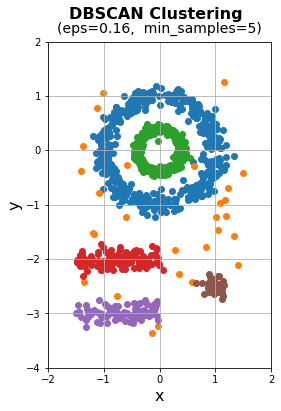

In [29]:
plt.figure(figsize=(4,6))

for label in df_cl.iloc[:,0].unique():
    plt.scatter(df_ms.iloc[df_cl[df_cl.iloc[:,0]==label].index, 0],
                df_ms.iloc[df_cl[df_cl.iloc[:,0]==label].index, 1],
                label=label)

plt.axis([-2, 2, -4, 2])
plt.grid(True)
plt.suptitle('DBSCAN Clustering', y=0.96, fontsize=16, fontweight='bold')
plt.title('(eps=0.16,  min_samples=5)', y=1.01, fontsize=14)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
#plt.legend()
plt.show()
# plt.savefig('fig04.jpg')

### K-Means Clustering

In [30]:
kmeans = KMeans(n_clusters=6, init='k-means++', n_init=30).fit(df_ms.iloc[:,0:2])
df_cl = pd.DataFrame(kmeans.labels_)
pd.crosstab(df_ms['shape'], kmeans.labels_)

col_0    0    1    2    3    4   5
shape                             
1      132    0  140  128    0   0
2      131    0  140  129    0   0
3        0    0    0    0  100   0
4        0  100    0    0    0   0
5       12    2   14    4    8  10
6        0    0    0    0    0  50

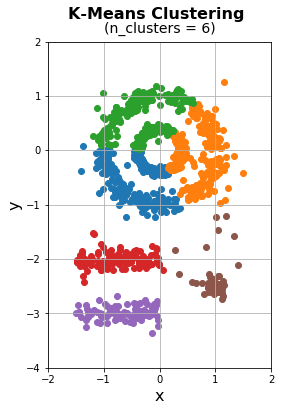

In [31]:
plt.figure(figsize=(4,6))

for label in df_cl.iloc[:,0].unique():
    plt.scatter(df_ms.iloc[df_cl[df_cl.iloc[:,0]==label].index, 0],
                df_ms.iloc[df_cl[df_cl.iloc[:,0]==label].index, 1],
                label=label)

plt.axis([-2, 2, -4, 2])
plt.grid(True)
plt.suptitle('K-Means Clustering', y=0.96, fontsize=16, fontweight='bold')
plt.title('(n_clusters = 6)', y=1.01, fontsize=14)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
#plt.legend()
plt.show()
# plt.savefig('fig05.jpg')

### Hierarchical Clustering

In [32]:
h_clustering = AgglomerativeClustering(linkage='ward', n_clusters=6).fit(df_ms.iloc[:, 0:2])
df_cl = pd.DataFrame(h_clustering.labels_)
pd.crosstab(df_ms['shape'], h_clustering.labels_)

col_0    0    1    2   3   4    5
shape                            
1        0   94  138   0  68  100
2        0  164  146   0  90    0
3      100    0    0   0   0    0
4      100    0    0   0   0    0
5       11    9    9   4   4   13
6        0    0    0  50   0    0

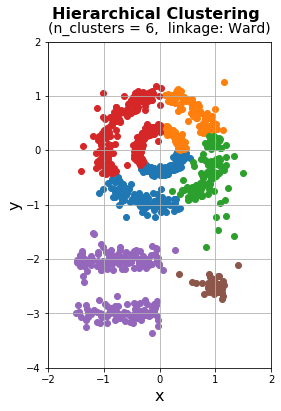

In [33]:
plt.figure(figsize=(4,6))

for label in df_cl.iloc[:,0].unique():
    plt.scatter(df_ms.iloc[df_cl[df_cl.iloc[:,0]==label].index, 0],
                df_ms.iloc[df_cl[df_cl.iloc[:,0]==label].index, 1],
                label=label)

plt.axis([-2, 2, -4, 2])
plt.grid(True)
plt.suptitle('Hierarchical Clustering', y=0.96, fontsize=16, fontweight='bold')
plt.title('(n_clusters = 6,  linkage: Ward)', y=1.01, fontsize=14)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
#plt.legend()
plt.show()
# plt.savefig('fig06.jpg')

## <font color='red'>Analyses :: Wine Data</font>

### PCA

In [34]:
# performing PCA on standardized data
pca = sklearn.decomposition.PCA(n_components=11).fit(df_st.iloc[:, 0:11])

# projection
coef_PCA = pca.transform(df_st.iloc[:, 0:11])

In [35]:
plt.figure(figsize=(6,6))

for label in df_all['color'].unique():
    plt.scatter(coef_PCA[df_all[df_all['color']==label].index, 0],
                coef_PCA[df_all[df_all['color']==label].index, 1],
                label=label, alpha=0.05)

plt.axis([-8, 6, -6, 8])
plt.axhline(y=0, xmin=-1, xmax=1, linestyle='--')
plt.axvline(x=0, ymin=-1, ymax=1, linestyle='--')
plt.grid(True)
plt.suptitle('PCA', y=0.96, fontsize=16, fontweight='bold')
plt.title('(on standardized wine data)', y=1.01, fontsize=14)
plt.xlabel('PC 1', fontsize=16)
plt.ylabel('PC 2', fontsize=16)
plt.legend()
plt.show()
# plt.savefig('fig07.jpg')

### DBSCAN

In [36]:
dbscan_clustering = DBSCAN(eps=2, min_samples=10).fit(df_st.iloc[:, 0:11])
df_cl = pd.DataFrame(dbscan_clustering.labels_)
pd.crosstab(df_all['color'], dbscan_clustering.labels_)

col_0   -1     0
color           
red    112  1487
white   97  4801

In [37]:
plt.figure(figsize=(6,6))

for label in df_cl.iloc[:,0].unique():
    plt.scatter(coef_PCA[df_cl[df_cl.iloc[:,0]==label].index, 0],
                coef_PCA[df_cl[df_cl.iloc[:,0]==label].index, 1],
                label=label, alpha=0.05)

plt.axis([-8, 6, -6, 8])
plt.axhline(y=0, xmin=-1, xmax=1, linestyle='--')
plt.axvline(x=0, ymin=-1, ymax=1, linestyle='--')
plt.grid(True)
plt.suptitle('DBSCAN Clustering', y=0.96, fontsize=16, fontweight='bold')
plt.title('(eps=2,  min_samples=10)', y=1.01, fontsize=14)
plt.xlabel('PC 1', fontsize=16)
plt.ylabel('PC 2', fontsize=16)
#plt.legend()
plt.show()
# plt.savefig('fig08.jpg')

### K-Means Clustering

In [38]:
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=30).fit(df_st.iloc[:, 0:11])
df_cl = pd.DataFrame(kmeans.labels_)
pd.crosstab(df_all['color'], kmeans.labels_)

col_0     0     1
color            
red    1575    24
white    67  4831

In [39]:
plt.figure(figsize=(6,6))

for label in df_cl.iloc[:,0].unique():
    plt.scatter(coef_PCA[df_cl[df_cl.iloc[:,0]==label].index, 0],
                coef_PCA[df_cl[df_cl.iloc[:,0]==label].index, 1],
                label=label, alpha=0.05)

plt.axis([-8, 6, -6, 8])
plt.axhline(y=0, xmin=-1, xmax=1, linestyle='--')
plt.axvline(x=0, ymin=-1, ymax=1, linestyle='--')
plt.grid(True)
plt.suptitle('K-Means Clustering', y=0.96, fontsize=16, fontweight='bold')
plt.title('(n_clusters = 2)', y=1.01, fontsize=14)
plt.xlabel('PC 1', fontsize=16)
plt.ylabel('PC 2', fontsize=16)
#plt.legend()
plt.show()
# plt.savefig('fig09.jpg')

### Hierarchical Clustering

In [40]:
h_clustering = AgglomerativeClustering(linkage='ward', n_clusters=2).fit(df_st.iloc[:, 0:11])
df_cl = pd.DataFrame(h_clustering.labels_)
pd.crosstab(df_all['color'], h_clustering.labels_)

col_0     0     1
color            
red      21  1578
white  4735   163

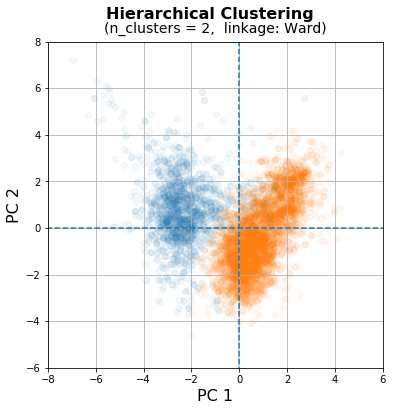

In [41]:
plt.figure(figsize=(6,6))

for label in df_cl.iloc[:,0].unique():
    plt.scatter(coef_PCA[df_cl[df_cl.iloc[:,0]==label].index, 0],
                coef_PCA[df_cl[df_cl.iloc[:,0]==label].index, 1],
                label=label, alpha=0.05)

plt.axis([-8, 6, -6, 8])
plt.axhline(y=0, xmin=-1, xmax=1, linestyle='--')
plt.axvline(x=0, ymin=-1, ymax=1, linestyle='--')
plt.grid(True)
plt.suptitle('Hierarchical Clustering', y=0.96, fontsize=16, fontweight='bold')
plt.title('(n_clusters = 2,  linkage: Ward)', y=1.01, fontsize=14)
plt.xlabel('PC 1', fontsize=16)
plt.ylabel('PC 2', fontsize=16)
#plt.legend()
plt.show()
# plt.savefig('fig10.jpg')